# This notebook combines 3 datasets to discover correlation between them. They are as below:
#    - Practice Prescription data for Dec 17 (NHS Digital)
#    - Patient list size from Oct-Dec17 Quarter (NHS BSA)
#    - Diabetics Indicators (latest - 2016/17) (PHE)
#    - CVD-Riskfactors Indicators (latest data) (PHE)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Import practice prescription data
prescriptionData = pd.read_csv('./T201712PDPI+BNFT.CSV', sep=',', encoding = "ISO-8859-1")
prescriptionData['CHAPTER'] = prescriptionData['BNF CODE'].str[:2]
prescriptionData.head()

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,,CHAPTER
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,1,0.47,0.55,14,201712,,04
1,Q44,RTV,Y04937,0401010Z0AAACAC,Zopiclone_Tab 3.75mg,1,0.46,0.54,14,201712,,04
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,1.62,1.96,69,201712,,04
3,Q44,RTV,Y04937,0401020P0AAABAB,Lorazepam_Tab 1mg,2,0.71,0.88,5,201712,,04
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,8.44,7.93,42,201712,,04


In [2]:
# Import patient list size data
patientListSizeData = pd.read_csv('Patient_List_Size_Dec17.csv', sep=',', encoding = "ISO-8859-1")
patientListSizeData.head()

,Regional Office Name,Regional Office Code,Area Team Name,Area Team Code,PCO Name,PCO Code,Practice Name,Practice Code,Male 0-4,Female 0-4,...,Male 35-44,Female 35-44,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+
0,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,ABBEY MEDICAL CENTRE,F82625,305,278,...,713,521,499,392,275,188,134,120,74,86
1,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,BARKING MEDICAL GROUP PRACTICE,F82018,479,420,...,838,863,709,732,531,471,273,321,214,356
2,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,CHILD & FAMILY HEALTH CENTRE,Y02583,636,655,...,1325,1052,574,415,207,204,55,68,21,51
3,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,DR A ARIF,F86040,181,172,...,392,357,347,219,185,162,88,99,67,84
4,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,DR A MOGHAL'S PRACTICE,F82677,245,280,...,465,508,450,464,242,237,149,147,94,143


In [3]:
# Import diabetes indicators data
diabeticIndicatorsData = pd.read_csv('..\..\..\..\MAIN_PROJECT\Data\PHE\DiabetesProfileIndicators.csv', sep=',', encoding = "ISO-8859-1")
#print(diabeticIndicatorsData.head(15))

C:\Users\Shashi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9,10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Import cvd indicators data
cvdIndicatorsData = pd.read_csv('..\..\..\..\MAIN_PROJECT\Data\PHE\CVD-RiskfactorsforCVD.Data.csv', sep=',', encoding = "ISO-8859-1")
#print(cvdIndicatorsData.head(15))

C:\Users\Shashi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9,10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
# Initialize base analysis parameters - practice codes and Chapter
PracticeCode1 = 'C83064'#'F81741' #'C83079'
PracticeCode2 = 'B81008'#'G82090' 'C83007'#'M92035'#'C83633'
Chapter       = '06'

In [82]:
# Prescription Data comparision between two practices
# Data Filters
PracticeFilter1 = prescriptionData['PRACTICE'] == PracticeCode1
PracticeFilter2 = prescriptionData['PRACTICE'] == PracticeCode2
ChapterFilter = prescriptionData['CHAPTER'] ==  Chapter

In [83]:
# Practice 1
PracticeData1 = prescriptionData[PracticeFilter1]
PracticeData1ByChapter = PracticeData1.groupby('CHAPTER')
PracticeData1ByChapter.sum()

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
CHAPTER,,,,,
01,6599,20512.58,19325.99,463653,33887616
02,21644,64048.08,60384.92,525425,78264256
03,4460,56516.69,52479.78,74581,32072208
04,13197,84272.13,78875.70,801727,112555296
05,1638,5472.65,5132.88,48495,14724976
06,6879,73948.80,68818.69,246681,44174928
07,1611,13930.76,12995.23,37784,18960928
08,195,5460.12,5067.45,6445,6253072
09,3091,17812.76,17308.04,846750,36509872


In [84]:
# Practice 2
PracticeData2 = prescriptionData[PracticeFilter2]
PracticeData2ByChapter = PracticeData2.groupby('CHAPTER')
PracticeData2ByChapter.sum()

,ITEMS,NIC,ACT COST,QUANTITY,PERIOD
CHAPTER,,,,,
01,5000,19857.45,18606.59,377941,33887616
02,17821,57081.67,53510.97,519340,65152976
03,4366,58642.88,54421.33,67861,31870496
04,11330,79260.69,74291.57,713261,112353584
05,1780,7954.89,7419.96,75256,17347232
06,5882,65040.33,60444.08,250101,46393760
07,1247,13442.76,12507.50,46330,20978048
08,227,9745.79,9038.84,10772,6656496
09,2970,38559.92,36320.56,1656181,45990336


In [87]:
# Patient List Size data comparision between two practices
patientSizeFilter1 = patientListSizeData['Practice Code'] == PracticeCode1
patientSizeFilter2 = patientListSizeData['Practice Code'] == PracticeCode2

practice1 = patientListSizeData[patientSizeFilter1]
practice2 = patientListSizeData[patientSizeFilter2]

C83064: 14095
B81008: 21896


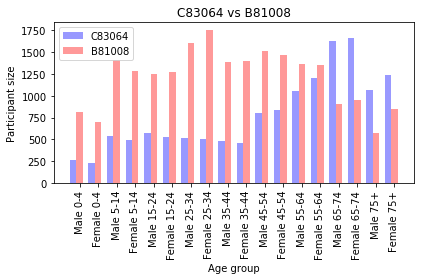

In [88]:

# VIEW PRACTICE AGE GROUPS SIDE BY SIDE
#referred : https://matplotlib.org/gallery/statistics/barchart_demo.html

import numpy as np
import matplotlib.pyplot as plt

n_groups = 18

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

practice1Values = practice1[practice1.columns[8:]].values[0]
practice2Values = practice2[practice1.columns[8:]].values[0]

print(PracticeCode1 + ': ' + str(practice1Values.sum()))
print(PracticeCode2 + ': ' + str(practice2Values.sum()))

rects1 = ax.bar(index, practice1Values, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label= PracticeCode1)

rects2 = ax.bar(index + bar_width, practice2Values, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label= PracticeCode2)

ax.set_xlabel('Age group')
ax.set_ylabel('Participant size')
ax.set_title(PracticeCode1 + ' vs ' + PracticeCode2) #  + ' vs ' + 'UK')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(practice1.columns[8:], rotation=90)
ax.legend()

fig.tight_layout()
plt.show()

In [79]:
# Diabetic indicator comparision between two practices
IndicatorFilter = diabeticIndicatorsData['Indicator ID'] == 241
TimePeriodFilter = diabeticIndicatorsData['Time period'] == '2016/17'

AreaCodeFilter1 = diabeticIndicatorsData['Area Code'] == PracticeCode1
AreaCodeFilter2 = diabeticIndicatorsData['Area Code'] == PracticeCode2

Practice1DbIndi = diabeticIndicatorsData[IndicatorFilter & AreaCodeFilter1 & TimePeriodFilter]
Practice2DbIndi = diabeticIndicatorsData[IndicatorFilter & AreaCodeFilter2 & TimePeriodFilter]

print(str(Practice1DbIndi['Count'].values) + ' vs ' + str(Practice2DbIndi['Count'].values))

[ 1786.] vs [ 1057.]


In [80]:
# CVD indicator comparision between two practices
CvdIndicatorFilter = cvdIndicatorsData['Indicator ID'] == 219
AreaCodeFilter1 = cvdIndicatorsData['Area Code'] == PracticeCode1
AreaCodeFilter2 = cvdIndicatorsData['Area Code'] == PracticeCode2

Practice1CvdIndi = cvdIndicatorsData[CvdIndicatorFilter & AreaCodeFilter1 & TimePeriodFilter]
Practice2CvdIndi = cvdIndicatorsData[CvdIndicatorFilter & AreaCodeFilter2 & TimePeriodFilter]

print(str(Practice1CvdIndi['Count'].values) + ' vs ' + str(Practice2CvdIndi['Count'].values))

C:\Users\Shashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[ 3696.] vs [ 2480.]


C:\Users\Shashi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [15]:
PrescriptionByPractice = prescriptionData.groupby('PRACTICE')
#PrescriptionByPractice.describe()


In [25]:
AreaCodeFilter = prescriptionData[' SHA'] == 'Q59'
AreaCodeQ59 = prescriptionData[AreaCodeFilter]

In [26]:
PrescriptionQ59ByPractice = AreaCodeQ59.groupby('PRACTICE')
#PrescriptionQ59ByPractice.head()

In [9]:
PrescriptionQ59ByPracticeSUM = PrescriptionQ59ByPractice.sum()

In [10]:
PrescriptionQ59ByPracticeSUM.columns

Index(['ITEMS  ', 'NIC        ', 'ACT COST   ', 'QUANTITY', 'PERIOD'], dtype='object')

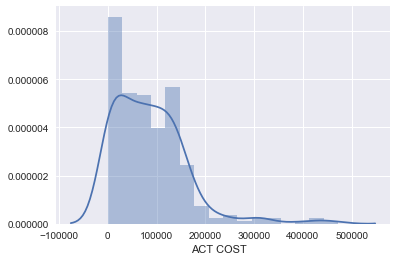

In [11]:
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(PrescriptionQ59ByPracticeSUM['ACT COST   ']);
plt.show()

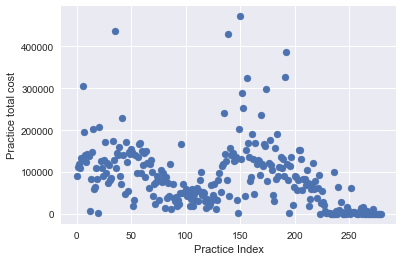

In [12]:
# Scatter plot of total practice costs for Q59 area
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, PrescriptionQ59ByPracticeSUM['ACT COST   '].count(), 1.0)
y = PrescriptionQ59ByPracticeSUM['ACT COST   ']
s = PrescriptionQ59ByPracticeSUM['ACT COST   '].count() * 10 + PrescriptionQ59ByPracticeSUM['ACT COST   '].max() + 100

plt.scatter(x, y)
plt.xlabel("Practice Index")
plt.ylabel("Practice total cost")
plt.show()

In [13]:
PrescriptionQ59ByPracticeSUM.to_csv("Q59_Costs.csv", sep=',')

In [17]:
PrescriptionByPracticeCosts = PrescriptionByPractice.sum()

In [3]:
patientListSizeData['TotalSize'] = patientListSizeData['Male 0-4'] + patientListSizeData['Female 0-4'] + patientListSizeData['Male 5-14']+ patientListSizeData['Female 5-14']+patientListSizeData['Male 15-24']+patientListSizeData['Female 15-24']+ patientListSizeData['Male 25-34']+patientListSizeData['Female 25-34']+patientListSizeData['Male 35-44']+ patientListSizeData['Female 35-44']+ patientListSizeData['Male 45-54']+ patientListSizeData['Female 45-54']+ patientListSizeData['Male 55-64']+ patientListSizeData['Female 55-64']+ patientListSizeData['Male 65-74']+ patientListSizeData['Female 65-74']+ patientListSizeData['Male 75+']+ patientListSizeData['Female 75+']
patientListSizeData.head()

,Regional Office Name,Regional Office Code,Area Team Name,Area Team Code,PCO Name,PCO Code,Practice Name,Practice Code,Male 0-4,Female 0-4,...,Female 35-44,Male 45-54,Female 45-54,Male 55-64,Female 55-64,Male 65-74,Female 65-74,Male 75+,Female 75+,TotalSize
0,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,ABBEY MEDICAL CENTRE,F82625,305,278,...,521,499,392,275,188,134,120,74,86,6891
1,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,BARKING MEDICAL GROUP PRACTICE,F82018,479,420,...,863,709,732,531,471,273,321,214,356,11558
2,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,CHILD & FAMILY HEALTH CENTRE,Y02583,636,655,...,1052,574,415,207,204,55,68,21,51,11037
3,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,DR A ARIF,F86040,181,172,...,357,347,219,185,162,88,99,67,84,4258
4,LONDON,Y56,NORTH EAST LONDON AREA TEAM,Q61,BARKING & DAGENHAM CCG,07L00,DR A MOGHAL'S PRACTICE,F82677,245,280,...,508,450,464,242,237,149,147,94,143,6299


In [4]:
# To find the average age profile of a GP
patientListSizeData['AvgAgeProfile'] = (patientListSizeData['Male 0-4'] *4 + patientListSizeData['Female 0-4'] * 4 + patientListSizeData['Male 5-14'] * 14 + patientListSizeData['Female 5-14'] * 14 +patientListSizeData['Male 15-24'] * 24 +patientListSizeData['Female 15-24'] * 24  + patientListSizeData['Male 25-34'] * 34 +patientListSizeData['Female 25-34'] * 34 +patientListSizeData['Male 35-44'] * 44 + patientListSizeData['Female 35-44'] * 44 + patientListSizeData['Male 45-54'] * 54 + patientListSizeData['Female 45-54'] * 54 + patientListSizeData['Male 55-64'] * 64+ patientListSizeData['Female 55-64'] * 64 + patientListSizeData['Male 65-74'] * 74+ patientListSizeData['Female 65-74'] * 74 + patientListSizeData['Male 75+'] * 100 + patientListSizeData['Female 75+'] * 100) / patientListSizeData['TotalSize']
patientListSizeData['AvgAgeProfile'].describe()

count    7327.000000
mean       45.329533
std         5.277515
min        25.005046
25%        42.013244
50%        45.690389
75%        48.761868
max       100.000000
Name: AvgAgeProfile, dtype: float64

In [32]:
#PrescriptionByPracticeCosts.to_csv("UK_PracticeCosts.csv", sep=',')

In [6]:
patientListSizeData.to_csv("UK_PracticeListSize.csv", sep=',')

In [41]:
practice2[practice1.columns[8:]].values[0].sum()

27878

In [89]:
prescriptionData['ACT COST   '].describe()

count    9.818208e+06
mean     6.950550e+01
std      1.875285e+02
min      0.000000e+00
25%      7.720000e+00
50%      2.212000e+01
75%      6.177000e+01
max      3.928655e+04
Name: ACT COST   , dtype: float64